In [1]:
# 警告(worning)の非表示化
import warnings
warnings.filterwarnings('ignore')

# 8章 数値シミュレーションで消費者行動を予測する10本ノック

ここでは、消費者行動が口コミなどの情報伝播によってどのように変化していくかを分析する、  
人間関係のネットワーク構造を用いた数値シミュレーション手法を中心に学んでいきます。

### ノック71：人間関係のネットワークを可視化してみよう

In [2]:
import pandas as pd

df_links = pd.read_csv("links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


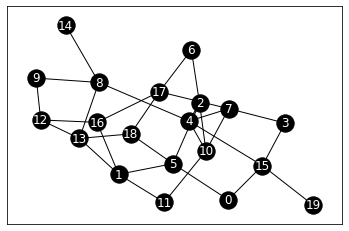

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
NUM = len(df_links.index)
for i in range(1,NUM+1):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))
        
# 描画 
nx.draw_networkx(G,node_color="k", edge_color="k", font_color="w")
plt.show()

### ノック72：口コミによる情報伝播の様子を可視化してみよう

In [4]:
import numpy as np

In [5]:
# 引数で指定した確率で1を返す関数
def determine_link(percent):
    # 連続一様分布から0以上1未満のランダムな小数を返却
    rand_val = np.random.rand()
    if rand_val <= percent:
        return 1
    else:
        return 0

In [6]:
# percolation: 浸透
"""
口コミシミュレート関数
num: ノード数
list_active: それぞれのノードに口コミが伝わったかを1,0で表す配列
percent_percolation: 口コミの起こる確率
"""
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i] == 1:
            for j in range(num):
                node_name = "Node" + str(j)
                # 繋がりがある かつ口コミが広がった場合
                if df_links[node_name].iloc[i] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = 1
    return list_active

In [7]:
percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index) #20
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []

for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

In [8]:
# アクティブノード可視化(色つける) #
def active_node_coloring(list_active):
    #print(list_timeSeries[t])
    list_color = []

    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i] == 1:
            list_color.append("r")
        else:
            list_color.append("k")
    
    #print(len(list_color))
    return list_color

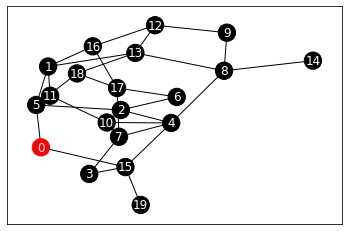

In [9]:
# 描画
t = 0
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries))
plt.show()

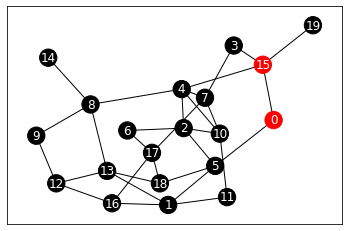

In [10]:
# 描画
t = 11
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

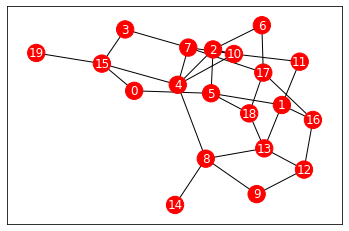

In [11]:
# 描画
t = 35
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

### ノック73：口コミ数の時系列変化をグラフ化してみよう

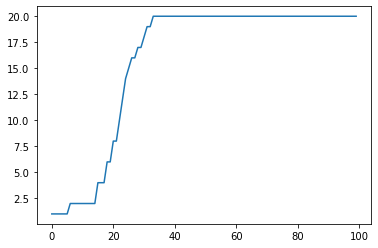

In [12]:
# 時系列グラフを描く
list_timeSeries_num = []

for i in range(len(list_timeSeries)):
    # 口コミ数
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

### ノック74：会員数の時系列変化をシミュレーションしてみよう

In [13]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence,df_links):
    # 拡散(口コミの電波) #
    for i in range(num):
        if list_active[i] == 1:
            for j in range(num):
                if df_links.iloc[i][j] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = 1
    # 消滅(退会) #
    for i in range(num):
        if determine_link(percent_disapparence) == 1:
            list_active[i] = 0
    
    return list_active

In [14]:
percent_percolation = 0.1 #伝播確率
percent_disapparence = 0.05 #消滅確率
T_NUM = 100 #シミュレーン月数
NUM = len(df_links.index) #20
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []

for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

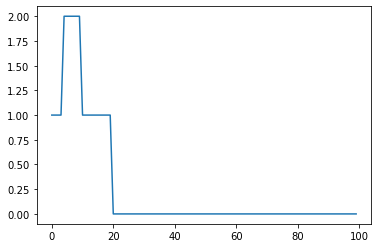

In [15]:
# 時系列グラフを描く
list_timeSeries_num = []

for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

In [16]:
percent_disapparence = 0.2 #20%で消滅
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

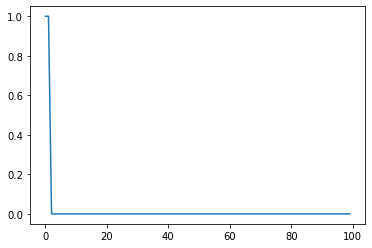

In [17]:
# 時系列グラフを描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

### ノック75：パラメータの全体像を相図を見ながら把握しよう

In [ ]:
# 相図計算
print("相図計算開始")
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))

for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p #拡散確率
        percent_disapparence = 0.05*i_d #消滅確率
        list_active = np.zeros(NUM)
        list_active[0] = 1
        
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
        
        phaseDiagram[i_p][i_d] = sum(list_active)

print(phaseDiagram)


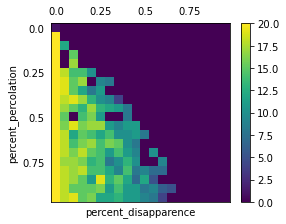

In [19]:
# 表示
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.show()

### ノック76：実データを読み込んでみよう

In [20]:
import pandas as pd
# 会員540人のSNSでのつながり
df_mem_links = pd.read_csv("links_members.csv")
# 会員540人の24ヶ月の利用状況(利用1,非利用0)
df_mem_info = pd.read_csv("info_members.csv")
df_mem_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df_mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### ノック77：リンク数の分布を可視化しよう

In [22]:
NUM = len(df_mem_links.index) #540
array_linkNum = np.zeros(NUM)
# 各会員のリンク数
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links["Node"+str(i)])

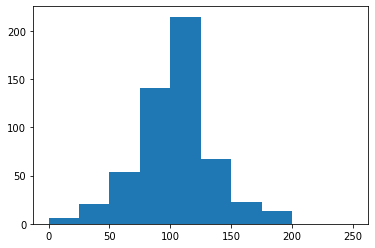

In [23]:
plt.hist(array_linkNum, bins=10,range=(0,250))
plt.show()

### ノック78：シミュレーションのために実データからパラメータを推定しよう

In [24]:
NUM = len(df_mem_info.index) #540人
T_NUM = len(df_mem_info.columns) - 1 #24ヶ月

# 消滅の確率推定(実データから確率を予想 重要) #
count_active = 0
count_active_to_inactive = 0

for t in range(1,T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t] == 1):
            count_active += 1
            if (df_mem_info.iloc[i][t+1] == 0):
                count_active_to_inactive += 1
# 1ヶ月前は会員だったが翌月退会した会員の数/会員人数*アクティブ月数
estimated_percent_disapparence = count_active_to_inactive/count_active

In [25]:
# 拡散の確率推定 #
# ノードへのリンクの本数にかかわらず変化が発生するので、
# なるべく重複して数えないような工夫が必要
count_link = 0
count_link_to_active = 0
count_link_temp = 0

for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)] == 1]
    temp_flag_count = np.zeros(NUM)

    for i in range(len(df_link_t.index)):
        # 会員iとリンクのある会員を抜き出し
        df_link_temp = df_mem_links[df_mem_links["Node" + str(df_link_t.index[i])] == 1]
        for j in range(len(df_link_temp.index)):
            # リンクのある会員がtヶ月目に非会員の場合
            if (df_mem_info.iloc[df_link_temp.index[j]][t] == 0):
                # 該当会員が非会員になったことがない場合
                if (temp_flag_count[df_link_temp.index[j]] == 0):
                    count_link += 1
                # リンクのある会員がt+1ヶ月目に会員になった場合
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1] == 1):
                    if (temp_flag_count[df_link_temp.index[j]] == 0):
                        temp_flag_count[df_link_temp.index[j]] = 1
                        count_link_to_active += 1

estimated_percent_percolation = count_link_to_active/count_link

In [26]:
estimated_percent_disapparence

0.10147163541419416

In [27]:
estimated_percent_percolation

0.025184661323275185

### ノック79：実データとシミュレーションを比較しよう

In [ ]:
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []

# シミュレーションで予測した会員数
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
T_NUM = len(df_mem_info.columns) - 1
list_timeSeries_num_real = []

# 実際の会員数
for t in range(0,T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)] == 1].index))

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

### ノック80：シミュレーションによる将来予測を実施しよう

In [ ]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
T_NUM = 36
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()